# Lab_03 회귀

### Context
#### Linear Regression
+ Simple Linear Regression
+ Multiple Linear Regression

#### Machine Learning Algorithm Based Regression
+ Decision Tree Regression
+ RandomForest Regression
+ MLP Regression

#### Evaluation
+ R<sup>2</sup>
+ Adjusted R<sup>2</sup>

In [1]:
import os
from os.path import join
import copy
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import sklearn

import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()

이번 회귀 실습을 위해 sklearn 내장 데이터인 보스톤 주택 데이터를 불러오겠습니다.<br>
보스톤 데이터셋은 범죄율, 강의 인접 유무, 세금 등 13개의 변수를 가지고 있으며, 주택 가격을 라벨 데이터로 가지고 있습니다.

In [3]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [4]:
data = boston.data
label = boston.target
columns = boston.feature_names

In [5]:
data = pd.DataFrame(data, columns = columns)
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [6]:
data.shape

(506, 13)

In [7]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


## Linear Regression
선형 회귀는 종속 변수와 한개 이상의 독립 변수와의 선형 상관 관계를 모델링하는 회귀 분석 기법입니다. <br>
용어를 종속 변수, 독립 변수로 표현하면 이해하기 어려우니 다음 수식에서의 y, x 로 표현하겠습니다.<br> 

$$ y = wx + b$$
$$ y = w_0x_0 + w_1x_1 + w_2x_2 + .... w_nx_n + b$$
$$ w : 계수(가중치) $$
$$ b : 절편(편향) $$

간단하게 생각해보면 선형 회귀는 데이터가 분포되어 있는 공간에서 데이터를 가장 잘 표현하는 선을 하나 긋는다고 생각할 수 있습니다.<br>
선형 회귀의 비용 함수는 다음과 같이 표현될 수 있습니다.

$$ Cost_{lr} = \sum_i{(y_i - \hat y_i)^2}$$
$$ \hat y_i = b + wx_i $$

결국 실제 참값 $y_i$와 회귀 모델이 출력한 $ \hat y $ 사이의 잔차의 제곱의 합을 최소화하는 w(계수)를 구하는 것이 목적입니다. -> Least Square, 최소 제곱법 <br>
선형 회귀는 출력되는 y가 1개 또는 2개 이상인지의 유무에 따라 단변량, 다변량이라는 말이 붙는데, 이번 수업에서는 출력값인 y가 1개(단변량)라고 가정하겠습니다. <br>
또한, 입력으로 들어가는 x가 1개 또는 2개 이상인지의 유무에 따라 단순(Simple), 다중(Multiple)이라는 말이 붙는데, 이번 실습에서는 단순, 다중 선형 회귀 분석에 대해 모두 알아보겠습니다.

#### 선형 회귀분석의 4가지 기본 가정
선형 회귀에는 4가지 가정이 필요합니다. 우리 수업에서는 이론적인 내용을 다루지 않으므로, 추후에 살펴보시면 좋겠습니다.<br>
맨 아래 참조 목록에 4가지 가정에 대해 잘 설명해준 페이지의 링크를 달아두었습니다.
1. 선형성
2. 독립성
3. 등분산성
4. 정규성

### 1. Simple Linear Regression
선형 회귀의 첫 번째로 x가 1개인 단순 회귀 분석에 대해 실습해보겠습니다.<br>
x 변수로 'RM' 변수를, y 변수는 주택 가격으로 하겠습니다.<br>
Linear Regression은 Sklearn의 linear_model 패키지에 있습니다.<br>

* 회귀부터는 데이터를 train, test로 나누어 진행하겠습니다. sklearn의 model_selection 패키지에 있는 train_test_split 함수를 사용합니다.

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data, label, test_size=0.2, random_state=2019)

#### 1) 모델 불러오기 및 정의하기

In [10]:
from sklearn.linear_model import LinearRegression
sim_lr = LinearRegression()

#### 2) 모델 학습하기 (훈련 데이터)

In [11]:
sim_lr.fit(x_train['RM'].values.reshape((-1, 1)), y_train)

LinearRegression()

#### 3) 결과 예측하기 (테스트 데이터)

In [12]:
y_pred = sim_lr.predict(x_test['RM'].values.reshape((-1, 1)))

#### 4) 결과 살펴보기
일반적으로 선형회귀 R<sup>2</sup>를 평가 척도로 사용합니다.<br>
R<sup>2</sup>값이 1에 가까울수록 회귀 모델이 데이터를 잘 표현한다는 것을 의미합니다.

In [13]:
from sklearn.metrics import r2_score

In [14]:
print('단순 선형 회귀, R2 : {:.4f}'.format(r2_score(y_test, y_pred)))

단순 선형 회귀, R2 : 0.1795


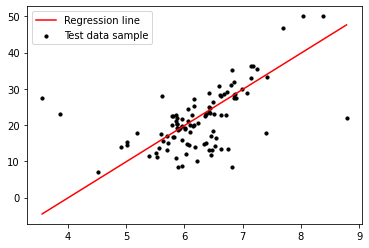

In [16]:
line_x = np.linspace(np.min(x_test['RM']), np.max(x_test['RM']), 10)
line_y = sim_lr.predict(line_x.reshape((-1, 1)))

plt.scatter(x_test['RM'], y_test, s=10, c='black')
plt.plot(line_x, line_y, c = 'red')
plt.legend(['Regression line', 'Test data sample'], loc='upper left')

#### 회귀 모델의 계수 w, 절편 b 살펴보기
어떤 변수에 얼마 만큼의 가중치가 할당되고, 절편 값은 얼마나 할당되는지 살펴볼 수 있습니다.

In [15]:
print('단순 선형 회귀, 계수(w) : {:.4f}, 절편(b) : {:.4f}'.format(sim_lr.coef_[0], sim_lr.intercept_))

단순 선형 회귀, 계수(w) : 9.9900, 절편(b) : -40.0941


### 2. Multiple Linear Regression
이번에는 x의 개수가 2개 이상인 다중 회귀 분석에 대해 실습해보겠습니다.<br>
x 변수로 보스톤 데이터셋에 존재하는 모든 변수를 사용하겠습니다.

#### 1) 모델 불러오기 및 정의하기

In [17]:
mul_lr = LinearRegression()

#### 2) 모델 학습하기 (훈련 데이터)

In [18]:
mul_lr.fit(x_train, y_train)

LinearRegression()

#### 3) 결과 예측하기 (테스트 데이터)

In [19]:
y_pred = mul_lr.predict(x_test)

#### 4) 결과 살펴보기
일반적으로 선형회귀 R<sup>2</sup>를 평가 척도로 사용합니다.<br>
R<sup>2</sup>값이 1에 가까울수록 회귀 모델이 데이터를 잘 표현한다는 것을 의미합니다.

In [20]:
print('다중 선형 회귀, R2 : {:.4f}'.format(r2_score(y_test, y_pred)))

다중 선형 회귀, R2 : 0.6174


보스톤 데이터셋이 가지고 있는 x 변수의 수는 13개, 그리고 주택 가격인 y 변수까지 합치면 14개의 변수가 됩니다.<br>
이는 14개의 차원으로 표현된다는 의미이고, 사람은 최대 3차원까지만 인식할 수 있으므로 시각화를 하기에는 어려움이 있습니다.

#### 회귀 모델의 계수 w, 절편 b 살펴보기
어떤 변수에 얼마 만큼의 가중치가 할당되고, 절편 값은 얼마나 할당되는지 살펴볼 수 있습니다.

In [ ]:
print('다중 선형 회귀, 계수(w) : {}, 절편(b) : {:.4f}'.format(mul_lr.coef_, mul_lr.intercept_))

## Machine Learning Algorithm Based Regression
이번에는 머신러닝 알고리즘을 기반으로한 회귀 모델에 대해 알아보겠습니다.<br>
Sklearn이 지원하는 머신러닝 기반 회귀 모델로는 결정 트리, 랜덤 포레스트, 서포트 벡터 머신, MLP, AdaBoost, Gradient Boosting 등이 있습니다.<br>
그 중 결정 트리, 서포트 벡터 머신, MLP 회귀 모델을 살펴보겠습니다.

### 1. Decision Tree Regressor
트리 모델은 데이터의 불순도(impurity, Entropy)를 최소화 하는 방향으로 트리를 분기하여 모델을 생성합니다. 자세한 내용은 분류 수업에서 설명 드리겠습니다.<br>
결정 트리 회귀 모델은 Sklearn의 tree 패키지에 있습니다. 

#### 1) 모델 불러오기 및 정의하기

In [21]:
from sklearn.tree import DecisionTreeRegressor
dt_regr = DecisionTreeRegressor(max_depth=5)

#### 2) 모델 학습하기 (훈련 데이터)

In [22]:
dt_regr.fit(x_train['RM'].values.reshape((-1, 1)), y_train)

DecisionTreeRegressor(max_depth=5)

#### 3) 결과 예측하기 (테스트 데이터)

In [23]:
y_pred = dt_regr.predict(x_test['RM'].values.reshape((-1, 1)))

#### 4) 결과 살펴보기
일반적으로 선형회귀 R<sup>2</sup>를 평가 척도로 사용합니다.<br>
R<sup>2</sup>값이 1에 가까울수록 회귀 모델이 데이터를 잘 표현한다는 것을 의미합니다.

In [24]:
print('단순 결정 트리 회귀, R2 : {:.4f}'.format(r2_score(y_test, y_pred)))

단순 결정 트리 회귀, R2 : 0.4204


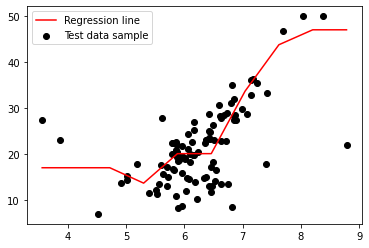

In [25]:
line_x = np.linspace(np.min(x_test['RM']), np.max(x_test['RM']), 10)
line_y = dt_regr.predict(line_x.reshape((-1, 1)))

plt.scatter(x_test['RM'].values.reshape((-1, 1)), y_test, c = 'black')
plt.plot(line_x, line_y, c = 'red')
plt.legend(['Regression line', 'Test data sample'], loc='upper left')

### 13개의 변수를 모두 사용해 결정 트리 회귀 모델을 사용해 보세요. (5분)

In [26]:
# 수강생 ver
dt_regre = DecisionTreeRegressor(max_depth=5)
dt_regre.fit(x_train, y_train)
y_pred = dt_regre.predict(x_test)
print('다중 결정 트리 회귀, R2 : {:.4f}'.format(r2_score(y_test, y_pred)))

다중 결정 트리 회귀, R2 : 0.6944


### 2. Support Vector Machine Regressor
서포트 벡터 머신의 기본 개념은 결정 경계와 가장 가까운 데이터 샘플의 거리(Margin)을 최대화 하는 방식으로 모델을 조정합니다.<br>
자세한 내용은 분류 파트에서 설명드리겠습니다. <br>
서포트 벡터 머신 회귀 모델은 Sklearn의 svm 패키지에 있습니다.

#### 1) 모델 불러오기 및 정의하기

In [27]:
from sklearn.svm import SVR
svm_regr = SVR()

#### 2) 모델 학습하기 (훈련 데이터)

In [28]:
svm_regr.fit(x_train['RM'].values.reshape((-1, 1)), y_train)

SVR()

#### 3) 결과 예측하기 (테스트 데이터)

In [30]:
y_pred = svm_regr.predict(x_test['RM'].values.reshape((-1, 1)))

#### 4) 결과 살펴보기
일반적으로 선형회귀 R<sup>2</sup>를 평가 척도로 사용합니다.<br>
R<sup>2</sup>값이 1에 가까울수록 회귀 모델이 데이터를 잘 표현한다는 것을 의미합니다.

In [31]:
print('단순 서포트 벡터 머신 회귀, R2 : {:.4f}'.format(r2_score(y_test, y_pred)))

단순 서포트 벡터 머신 회귀, R2 : 0.4920


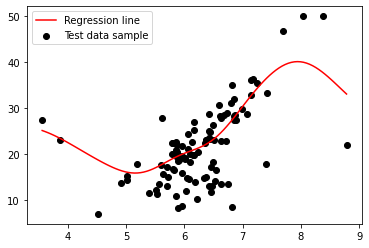

In [32]:
line_x = np.linspace(np.min(x_test['RM']), np.max(x_test['RM']), 100)
line_y = svm_regr.predict(line_x.reshape((-1, 1)))

plt.scatter(x_test['RM'], y_test, c = 'black')
plt.plot(line_x, line_y, c = 'red')
plt.legend(['Regression line', 'Test data sample'], loc='upper left')

### 13개의 변수를 모두 사용해 서포트 벡터 머신 회귀 모델을 사용해 보세요. (5분)

In [33]:
# 수강생 ver
svm_regr = SVR(C=20,)
svm_regr.fit(x_train, y_train)
y_pred = svm_regr.predict(x_test)
print('다중 서포트 벡터 머신 회귀, R2 : {:.4f}'.format(r2_score(y_test, y_pred)))

다중 서포트 벡터 머신 회귀, R2 : 0.3985


### 3. Multi Layer Perceptron Regressor
딥러닝의 기본 모델인 뉴럴 네트워크를 기반으로 한 회귀 모델입니다. 기본적으로 MLP라 하면, 입력층-은닉층-출력층 3개로 이루어진 뉴럴 네트워크를 의미합니다.

![Feedforword](./img/Feedforword.png)

#### 어떻게 뉴럴 네트워크가 비선형 문제를 해결할 수 있을까?
은닉층에 존재하는 하나하나의 노드는 기본 선형 회귀 모델과 동일하게 $ wx + b $로 이루어져 있습니다. <br>
하지만 이런 선형 분리를 할 수 있는 모델을 여러개를 모아 비선형 분리를 수행하는 것이 뉴럴 네트워크 입니다.<br>

![HowNNSolve](./img/HowNNSolve.png)

아래 그림을 보면 4개의 벡터 공간을 선형 분리하는 퍼셉트론들이 하나의 비선형 공간을 분류할 수 있는 벡터 공간을 형성하는 것을 확인할 수 있습니다.<br>
직관적으로는 이해하기 어려우시겠지만, 우리가 케익을 4개의 퍼셉트론들이 분할하는 대로 잘라 가운데 부분을 남기는 것을 생각해보시면 되겠습니다.

MLP 회귀 모델은 Sklearn의 neural_network 패키지에 있습니다.

#### 1) 모델 불러오기 및 정의하기

In [34]:
from sklearn.neural_network import MLPRegressor
mlp_regr = MLPRegressor(solver='lbfgs')

#### 2) 모델 학습하기 (훈련 데이터)

In [35]:
mlp_regr.fit(x_train['RM'].values.reshape((-1, 1)), y_train)

MLPRegressor(solver='lbfgs')

#### 3) 결과 예측하기 (테스트 데이터)

In [36]:
y_pred = mlp_regr.predict(x_test['RM'].values.reshape((-1, 1)))

#### 4) 결과 살펴보기
일반적으로 선형회귀 R<sup>2</sup>를 평가 척도로 사용합니다.<br>
R<sup>2</sup>값이 1에 가까울수록 회귀 모델이 데이터를 잘 표현한다는 것을 의미합니다.

In [37]:
print('단순 MLP 회귀, R2 : {:.4f}'.format(r2_score(y_test, y_pred)))

단순 MLP 회귀, R2 : 0.3345


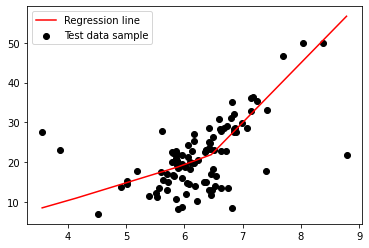

In [38]:
line_x = np.linspace(np.min(x_test['RM']), np.max(x_test['RM']), 10)
line_y = mlp_regr.predict(line_x.reshape((-1, 1)))

plt.scatter(x_test['RM'], y_test, c = 'black')
plt.plot(line_x, line_y, c = 'red')
plt.legend(['Regression line', 'Test data sample'], loc='upper left')

### 13개의 변수를 모두 사용해 MLP 회귀 모델을 사용해 보세요. (5분)

In [39]:
mlp_regr = MLPRegressor(hidden_layer_sizes=(50, ), activation='tanh', solver ='sgd', random_state=2019)
mlp_regr.fit(x_train, y_train)
y_pred = mlp_regr.predict(x_test)
print('다중 MLP 회귀, R2 : {:.4f}'.format(r2_score(y_test, y_pred)))

다중 MLP 회귀, R2 : 0.0527


## Evaluation
### R<sup>2</sup>
Scikit-Learn에서 지원하는 회귀 모델의 평가 방법으로는 R<sup>2</sup>가 있습니다. <br>
학습한 회귀 모델이 얼마나 데이터를 잘 표현하는지에 대한 정도를 나타내는 통계적인 척도이며, 0 < R<sup>2</sup> < 1 범위의 값을 갖습니다.<br>

<img src = './img/R2.png' alt='R2' align='left' height=500 width=500 /> 

$$ R^2 = 1 - {SSR \over SST} $$

* R<sup>2</sup> = 1, 모델이 데이터를 완벽하게 표현함 (Fits perfectly)
* R<sup>2</sup> = 0, 모델이 데이터를 전혀 표현하지 못함 (Does not explain anything)

### Adjust R<sup>2</sup>
R<sup>2</sup>가 회귀 모델을 평가하기에 좋은 척도이긴 하지만 변수의 수가 증가하는 경우, R<sup>2</sup> 값은 모델 성능에 관계없이 값이 유지되거나 증가하게 됩니다. <br>
Adjust R<sup>2</sup>는 이러한 문제를 해결하기 위해 나온 평가 척도이며, 변수의 수를 고려하여 R<sup>2</sup> 값을 계산하게 됩니다. <br>
따라서 변수가 추가되었을 때 추가된 변수가 모델의 성능에 영향을 주는지 확인할 수 있게됩니다.

$$\bar R^2 = 1 - (1 - R^2){{n-1} \over {n - p - 1}} = 1 - {{SSR/df_e} \over {SST/df_t}} $$<br>
$$ df_e : 샘플의\ 자유도$$<br>
$$ df_t : 샘플\ 및\ x변수의\ 수를\ 고려한\ 자유도$$

아쉽게도 Adjust R<sup>2</sup>는 Sklearn에서 지원하지는 않습니다.

### Reference
- 선형 회귀의 기본 가정 : https://kkokkilkon.tistory.com/175
- Wikipedia, Linear Regression : https://ko.wikipedia.org/wiki/선형_회귀
- Wikipedia, R-Square : https://en.wikipedia.org/wiki/Coefficient_of_determination
- Sklearn, Boston dataset : https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html
- Sklearn, Linear Regression : https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
- Sklearn, Decision Tree Regression : https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html
- Sklearn, Support Vector Machine Regression : https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html
- Sklearn, MLP Regression : https://www.google.com/url?q=http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html&sa=U&ved=0ahUKEwjsntScreDhAhWMfbwKHWBXAbIQFggOMAU&client=internal-uds-cse&cx=016639176250731907682:tjtqbvtvij0&usg=AOvVaw3lJrRpqB9lWv_Fd98pGuJD
- Sklearn, R-Square : https://www.google.com/url?q=http://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html&sa=U&ved=0ahUKEwicgu3vueDhAhUI9LwKHeLDD3UQFggEMAA&client=internal-uds-cse&cx=016639176250731907682:tjtqbvtvij0&usg=AOvVaw3JYUuCpR-KNsPU189XgvWR